# 7.1 A Spectrum of workflows
Skip
# 7.2 Different ways to build Keras models
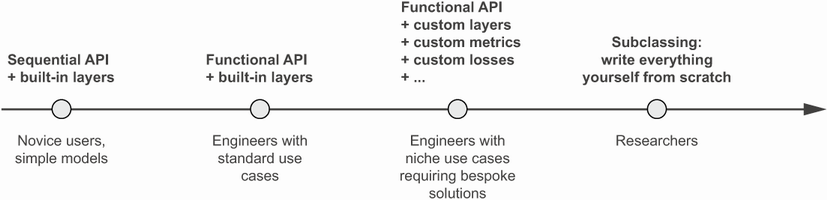

There are three APIs for building models in Keras (see figure):

1. **Sequential model**: the most approachable API—it’s basically a Python list. As such, it’s limited to simple stacks of layers.
2. **Functional API**: which focuses on graph-like model architectures. It represents a nice mid-point between usability and flexibility, and as such, it’s the most commonly used model-building API.
3. **Model subclassing**: a low-level option where you write everything yourself from scratch. This is ideal if you want full control over every little thing. However, you won’t get access to many built-in Keras features, and you will be more at risk of making mistakes.

## 7.2.1 The Sequential model
This is the simplest way to build a model in Keras. We are already familiar with this.

In [1]:
# from keras import datasets as kds

# # num_words is the most frequent words
# (train_data, train_labels), (test_data, test_labels) = kds.imdb.load_data(
#     num_words=10_000
# )

# print(train_data[0][:20])
# print(train_labels[0])
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

keras.backend.clear_session()

# Familiar form
model = keras.Sequential(
    [layers.Dense(64, activation="relu"), layers.Dense(10, activation="softmax")]
)

# Adding layers
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# Models that are not built yet have no weight
## Calling 'model.weights' would produce error

# Building model
model.build(input_shape=(None, 3))
print(f"model.weights:{model.weights}")

model.summary()

# We can also name models and layers
named_model = keras.Sequential(name="my_example_model")
named_model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
named_model.add(layers.Dense(10, activation="relu", name="my_last_layer"))
named_model.build((None, 3))
named_model.summary()

# Specifying input shape in advance
model_with_defined_input_shape = keras.Sequential()
model_with_defined_input_shape.add(keras.Input(shape=(3,)))
model_with_defined_input_shape.add(layers.Dense(64, activation="relu"))
model_with_defined_input_shape.summary()

model.weights:[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>, <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>, <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>, <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

## 7.2.2 The Functional API
Sequential model is simple but very limited, allowing only a single input/output. However it is common to find models that use multiple inputs (ex. image + metadata), multiple outputs, or non linear topology.

### Simple Example

In [2]:
# Clear old model
keras.backend.clear_session()

## 1. Declare input
inputs = keras.Input(shape=(3,), name="my_input")

## 2. Create layer and call it to input
features = layers.Dense(64, activation="relu")(inputs)

## 3. Instantiate model by specifying input and output in model constructor
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### Multi-Input, Multi-Output Model Example
Let’s say you’re building a system to rank customer support tickets by priority and route them to the appropriate department. Your model has three inputs:

* The title of the ticket (text input)
* The text body of the ticket (text input)
* Any tags added by the user (categorical input, assumed here to be one-hot encoded)

Your model also has two outputs:

* The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
* The department that should handle the ticket (a softmax over the set of departments)

In [3]:
# Clear old model
keras.backend.clear_session()

vocab_size = 10_000
num_tags = 100
num_departments = 4

# 1.1 Define model inputs
title = keras.Input(shape=(vocab_size,), name="title")
text_body = keras.Input(shape=(vocab_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# 1.2 Create list of inputs
inputs = [title, text_body, tags]

# 2. Combine input features into a single tensor by concatenating them
features = layers.Concatenate()(inputs)

# 3. Apply intermediate layer to recombine input features into richer representations
features = layers.Dense(64, activation="relu")(features)

# 4.1 Define model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(
    features
)

# 4.2 Create list of outputs
outputs = [priority, department]

# 5. Create model specifying inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# 6. Create dummy data
num_samples = 1280

# 6.1 Dummy inputs
title_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# 6.2 Dummy targets
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))


# 7. Fit and evaluate

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)
model.fit(
    [title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1
)
model.evaluate(
    [title_data, text_body_data, tags_data], [priority_data, department_data]
)
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

# We can use dicts to avoid worrying about the order of inputs
model.compile(
    optimizer="rmsprop",
    loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
    metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]},
)
history = model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1,
)
evaluation = model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

print("Evaluation:", evaluation)
print("Priority Predictions Shape:", priority_preds.shape)
print("Department Predictions Shape:", department_preds.shape)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_accuracy: 0.3073 - loss: 32.8487 - priority_mean_absolute_error: 0.4652
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.0739 - loss: 32.6428 - priority_mean_absolute_error: 0.4959 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_accuracy: 0.2542 - loss: 41.7794 - priority_mean_absolute_error: 0.4934 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.5671 - loss: 32.4765 - priority_mean_absolute_error: 0.4959 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Evaluation: [32.276451110839844, 0.5625, 0.49218183755874634]
Priority Predictions Shape: (1280, 1)
Department Predictions Shape: (1280, 4)


### Access to Layer Connectivity
A functional model is an explicit data structure.

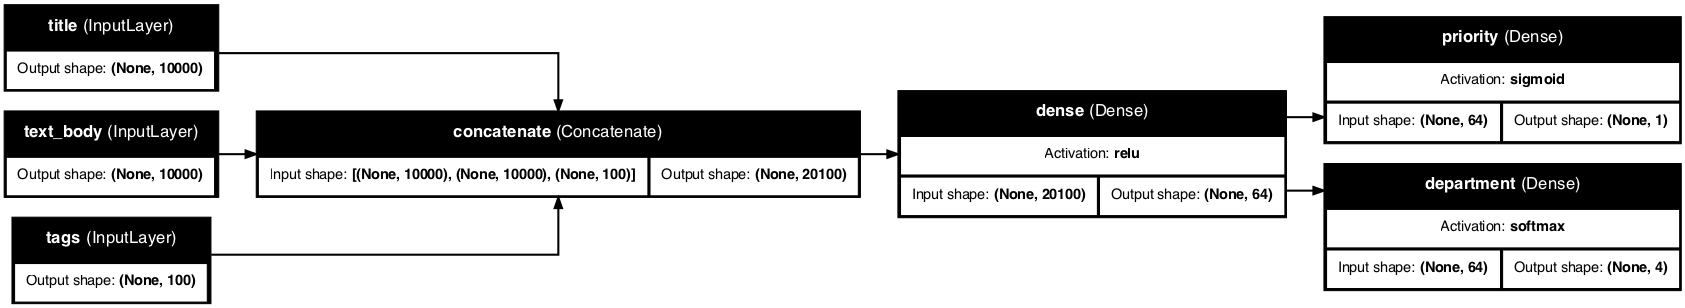



========== model.layers ==========


[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]



========== model.layers[3].input ==========


[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]



========== model.layers[3].output ==========


<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor>

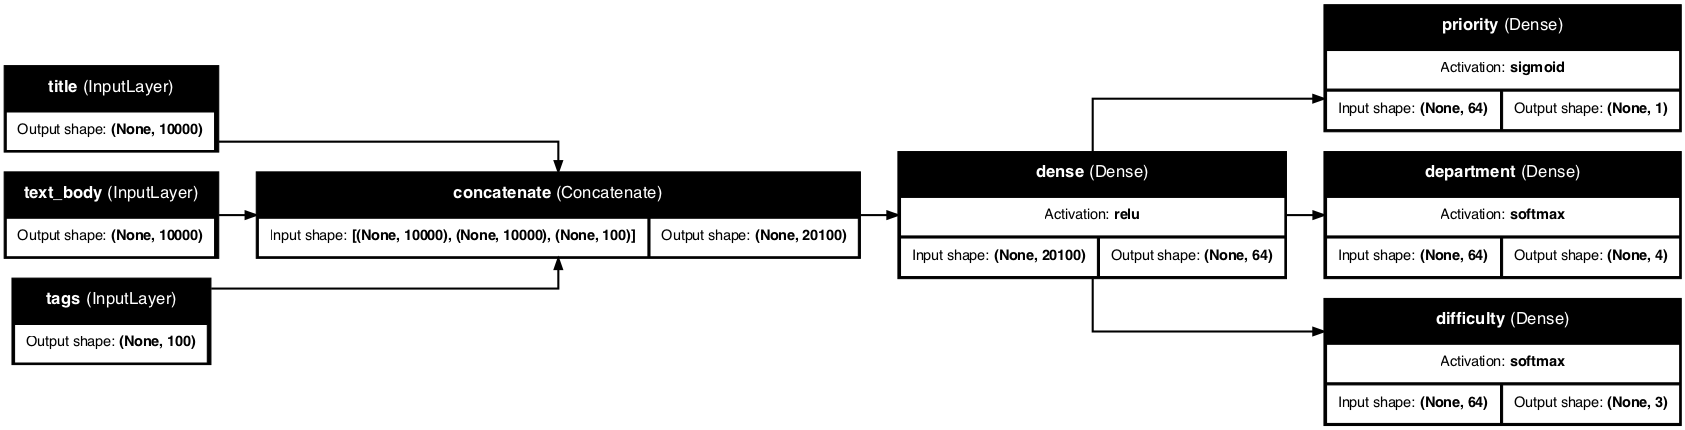

In [4]:
# Inspect how models are connected
# None in tensor shape represents batch size - any size is allowed
display(
    keras.utils.plot_model(
        model,
        show_shapes=True,
        show_layer_activations=True,
        show_trainable=False,
        dpi=75,
        expand_nested=False,
        rankdir="LR",
        show_dtype=False,
        show_layer_names=True,
    )
)
print("\n")

# Access to layer connectivity means we can reuse nodes
# 1. Retrieving inputs/outputs of functional layer
print("========== model.layers ==========")
display(model.layers)
print("\n")
print("========== model.layers[3].input ==========")
display(model.layers[3].input)
print("\n")
print("========== model.layers[3].output ==========")
display(model.layers[3].output)

# 2. Creating a new model by reusing intermediate layer outputs
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
    inputs=[title, text_body, tags], outputs=[priority, department, difficulty]
)

display(
    keras.utils.plot_model(
        new_model,
        show_shapes=True,
        show_layer_activations=True,
        show_trainable=False,
        dpi=75,
        expand_nested=False,
        rankdir="LR",
        show_dtype=False,
        show_layer_names=True,
    )
)

## 7.2.3 Subclassing the Model class

The last model-building pattern you should know about is the most advanced one: `Model` subclassing. You learned in chapter 3 how to subclass the `Layer` class to create custom layers. Subclassing `Model` is pretty similar:

- In the `__init__()` method, define the layers the model will use.
- In the `call()` method, define the forward pass of the model, reusing the layers previously created.
- Instantiate your subclass, and call it on data to create its weights.

#### REWRITING OUR PREVIOUS EXAMPLE AS A SUBCLASSED MODEL

Let’s take a look at a simple example: we will reimplement the customer support ticket management model using a `Model` subclass.

In [5]:
# Clear old model
keras.backend.clear_session()

# 1. A simple subclassed model


class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()

        # Define sub-layers in constructor
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")

    def call(self, inputs):
        # Define forward pass using this method

        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return {"priority": priority, "department": department}


# Sample usage
model = CustomerTicketModel(num_departments=4)

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)

history = model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1,
)
evaluation = model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
)

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

/opt/anaconda3/envs/deep-learning-intro-course/lib/python3.11/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_mean_absolute_error: 0.5121 - loss: 0.4784 - priority_accuracy: 0.0000e+00
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_mean_absolute_error: 0.5168 - loss: 0.5168 - priority_accuracy: 0.0000e+00
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
